In [1]:
##Yunzhong "Gary" Gao
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
##from sklearn.preprocessing import Imputer
import statsmodels.api as sm

In [2]:
cost = pd.read_csv(r"C:\Users\akabo\OneDrive\Desktop\camden buckhead\Shipt-DataAnalyst-TakeHome\InterviewData_Cost.csv",sep = ",")
print (cost.head())
print (cost.shape)
rev = pd.read_csv(r"C:\Users\akabo\OneDrive\Desktop\camden buckhead\Shipt-DataAnalyst-TakeHome\InterviewData_REV.csv",sep = ",")
print(rev.head())
print (rev.shape)

       date source_id    cost
0  10/17/14    PA0577  7168.0
1   8/17/14    PA0354  7615.0
2    1/7/14    PA0607  4054.0
3   8/25/14    PA0745  9317.0
4  11/30/14    PA0923  5586.0
(10000, 3)
      date source_id  revenue
0   8/1/14    PA0368   5717.0
1  1/31/14    PA0277   1380.0
2   6/9/14    PA0745   7535.0
3   9/1/14    PA0751   2868.0
4  3/12/14    PA0859  10757.0
(10000, 3)


#  1. returning	all	rows	from	both	regardless	of	whether	there	is	a	match	between	the	two	data	sets.

In [3]:
cost_rev=cost.merge(rev, on=['date', "source_id"], how='outer')

In [4]:
print(cost_rev)

           date source_id    cost  revenue
0      10/17/14    PA0577  7168.0   8417.0
1       8/17/14    PA0354  7615.0   4200.0
2        1/7/14    PA0607  4054.0   7935.0
3       8/25/14    PA0745  9317.0   5536.0
4      11/30/14    PA0923  5586.0      NaN
5      12/22/14    PA0808  8049.0   3573.0
6      12/17/14    PA0952  6662.0      NaN
7       5/22/14    PA0411  4795.0      NaN
8        7/7/14    PA0526  2691.0   5311.0
9      10/14/14    PA0168  9651.0      NaN
10      2/13/14    PA0354  2752.0      NaN
11     11/23/14    PA0526  3121.0   3303.0
12     11/23/14    PA0277  5691.0      NaN
13     11/27/14    PA0057  7423.0      NaN
14       3/2/14    PA0482  6401.0   8882.0
15     11/18/14    PA0368  3174.0   5361.0
16      3/29/14    PA0552  7894.0      NaN
17       5/6/14    PA0696  6595.0   4292.0
18      8/31/14    PA0258  6305.0   4644.0
19       5/8/14    PA0338  7561.0  11325.0
20       4/3/14    PA0619  4288.0      NaN
21      3/19/14    PA0619  2656.0  10086.0
22      8/2

# 2.	returning	only	the	rows	from	the	“Cost”	file	that	have	no	corresponding	date	in	the	“Revenue”	file

In [5]:
df =cost.merge(rev, on=['date', "source_id"], how='left')

In [202]:
df[df['revenue'].isnull()].reset_index()

,index,date,source_id,cost,revenue
0,4,11/30/14,PA0923,5586.0,NaN
1,6,12/17/14,PA0952,6662.0,NaN
2,7,5/22/14,PA0411,4795.0,NaN
3,9,10/14/14,PA0168,9651.0,NaN
4,10,2/13/14,PA0354,2752.0,NaN
5,12,11/23/14,PA0277,5691.0,NaN
6,13,11/27/14,PA0057,7423.0,NaN
7,16,3/29/14,PA0552,7894.0,NaN
8,20,4/3/14,PA0619,4288.0,NaN
9,22,8/21/14,PA0552,4653.0,NaN


# 3 .	what	are	the	Top	4	sources	(“source_id”	values)	in	terms	of	total	revenue	generation	across	this	data	set?

In [7]:
cost_rev['cost'] = cost_rev['cost'].fillna(0)
cost_rev['revenue'] = cost_rev['revenue'].fillna(0)

In [8]:
new_df = cost_rev.groupby(['source_id'])['revenue'].agg("sum").reset_index()
new_df.sort_values(by = ['revenue'], ascending=False).head(4).reset_index()

,index,source_id,revenue
0,24,PA0527,1385747.0
1,11,PA0308,1338615.0
2,14,PA0352,1309685.0
3,27,PA0552,1283190.0


In [46]:
df= cost_rev[cost_rev["source_id"] == "PA0527"] 
df1 = cost_rev[cost_rev["source_id"] == "PA0308"] 

In [49]:
df["month"] = pd.to_datetime(df['date']).dt.month
df1["month"] = pd.to_datetime(df1['date']).dt.month

C:\Users\akabo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\akabo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [51]:
new_df = df.groupby(['month'])['revenue'].agg("sum").reset_index()
new_df1 = df1.groupby(['month'])['revenue'].agg("sum").reset_index()

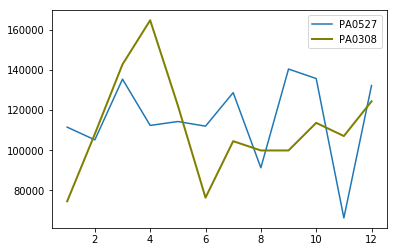

In [55]:
#df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21) })
 
# multiple line plot
plt.plot( 'month', 'revenue', data=new_df, label="PA0527")
plt.plot( 'month', 'revenue', data=new_df1, marker='', color='olive', linewidth=2, label="PA0308")
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()


In [ ]:
# here is the four top source_id with total highest revenue

 i am thinking of used a Multiple lines chart with month as x-axis and revenue as y-axis.
 First selecting the top four source_id from table with their revenue and dates.
 Then use matplotlib.pyplot.plot to depict four revenue data with 4 different colors of line showing fluctation of revenue monthly in a year.
 The use of multiple lines chart can also compare the revenue of 4 different source_id based on same month.


# 4. Apply	this	model	to	the	same	data	that	the	model	was	trained	on	and	assess	the	prediction	accuracy

In [56]:
df = pd.read_csv(r"C:\Users\akabo\OneDrive\Desktop\camden buckhead\Shipt-DataAnalyst-TakeHome\InterviewData_Activity.csv",sep = ",")
print (df.head())
print (df.shape)


          userid     date  age gender metropolitan_area device_type  active
0  4e3a9ea937b3a   8/4/15   30      F           Detroit      Tablet       1
1  4e3dd5154a08c   8/6/15   43      F         Charlotte     Desktop       1
2  4e3df1ecd131a   8/6/15   41      F             Tampa      Mobile       1
3  4e4e77461b1e3  8/19/15   56      F         Nashville     Desktop       1
4  4e4eb59b6de55  8/19/15   33      F           Detroit      Mobile       1
(5420, 7)


In [57]:
dummy_genders = pd.get_dummies(df['gender'], prefix = 'gender')
dummy_metro = pd.get_dummies(df['metropolitan_area'], prefix = 'metro_area')
dummy_device = pd.get_dummies(df['device_type'], prefix = 'device')
cols_to_keep = ['active', 'age']
activity_data = df[cols_to_keep].join(dummy_genders.ix[:, 'gender_M':])
activity_data = activity_data.join(dummy_metro.ix[:, 'metro_area_Birmingham':])
activity_data = activity_data.join(dummy_device.ix[:, 'device_Mobile':])

C:\Users\akabo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\akabo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\akabo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [60]:
activity_data = sm.add_constant(activity_data, prepend=False)
explanatory_cols = activity_data.columns[1:]
full_logit_model = sm.GLM(activity_data['active'],activity_data[explanatory_cols],family=sm.families.Binomial())
result = full_logit_model.fit()
y_pred = result.predict(activity_data[explanatory_cols])

In [59]:
# select threshold for the target variable
y_pred[y_pred >= 0.5]  =1
y_pred[y_pred < 0.5]  =0

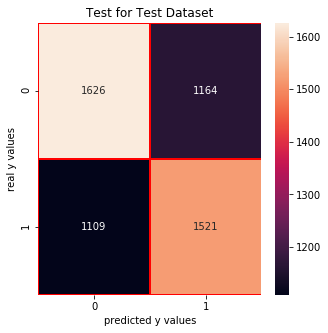

precision_score:  0.5664804469273743
recall_score:  0.5783269961977187
The predictive accuracy is:  0.58
The classification error is:  0.42
f1_score:  0.5723424270931327


In [170]:
y_test = activity_data['active']
from sklearn.metrics import confusion_matrix
cm_lrc = confusion_matrix(y_test,y_pred)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test,y_pred))
print("recall_score: ", recall_score(y_test,y_pred))
accuracy = sum(y_pred == y_test)/len(y_test)
error = 1 - accuracy
print("The predictive accuracy is: ", round(accuracy, 2))
print("The classification error is: ", round(error, 2))
from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test,y_pred))

# 5. Assess	the	training	data	model’s	accuracy	on	the	test	data.	Why	does	the	accuracy	change	so	much? 

# training data accuracy

In [62]:
training_data = activity_data[1:4000]
test_data = activity_data[4001:].copy()
training_logit_model = sm.GLM(training_data['active'],training_data[explanatory_cols],family=sm.families.Binomial())
training_result = training_logit_model.fit()

In [63]:
# select threshold for the target variable
y_pred = training_result.predict(training_data[explanatory_cols])
y_pred[y_pred >= 0.5]  =1
y_pred[y_pred < 0.5]  =0

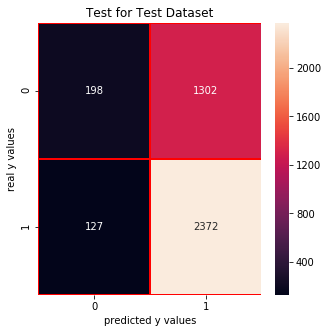

precision_score:  0.6456178551986935
recall_score:  0.9491796718687475
The predictive accuracy is:  0.64
The classification error is:  0.36
f1_score:  0.7685080187915114


In [174]:
y_test = training_data['active']
from sklearn.metrics import confusion_matrix
cm_lrc = confusion_matrix(y_test,y_pred)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test,y_pred))
print("recall_score: ", recall_score(y_test,y_pred))
accuracy = sum(y_pred == y_test)/len(y_test)
error = 1 - accuracy
print("The predictive accuracy is: ", round(accuracy, 2))
print("The classification error is: ", round(error, 2))
from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test,y_pred))

# test data accuracy

In [64]:
y_pred = training_result.predict(test_data[explanatory_cols])
y_test = test_data['active']
# y_pred[y_pred >= 0.5]  =1
# y_pred[y_pred < 0.5]  =0

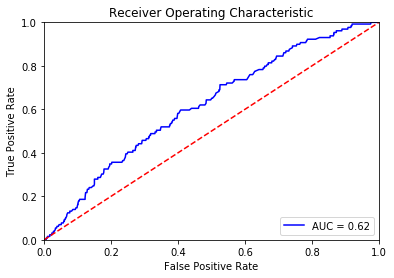

In [65]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

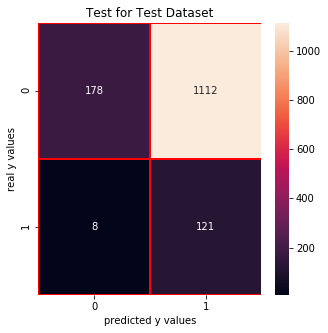

precision_score:  0.09813463098134631
recall_score:  0.937984496124031
The predictive accuracy is:  0.21
The classification error is:  0.79
f1_score:  0.1776798825256975


In [176]:

from sklearn.metrics import confusion_matrix
cm_lrc = confusion_matrix(y_test,y_pred)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test,y_pred))
print("recall_score: ", recall_score(y_test,y_pred))
accuracy = sum(y_pred == y_test)/len(y_test)
error = 1 - accuracy
print("The predictive accuracy is: ", round(accuracy, 2))
print("The classification error is: ", round(error, 2))
from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test,y_pred))

The training model accuracy is 0.64 but the test model accuracy is only 0.21. That's what we call as overfitting. In other words, the model remembers a huge number of examples instead of learning to notice features.The possibility of over-fitting exists because the criterion used for selecting the model is not the same as the criterion used to judge the suitability of a model. 

# 6

In [69]:
par = pd.read_csv(r"C:\Users\akabo\OneDrive\Desktop\camden buckhead\Shipt-DataAnalyst-TakeHome\InterviewData_Parsing.csv",sep = ",")

In [70]:
par.head()

,userid,data_to_parse
0,54f3ad9a29ada,"""value"":""N;U;A7;W""}]"
1,54f69f2de6aec,"""value"":""N;U;I6;W""}]"
2,54f650f004474,"""value"":""Y;U;A7;W""}]"
3,54f52e8872227,"""value"":""N;U;I1;W""}]"
4,54f64d3075b72,"""value"":""Y;U;A7;W""}]"


In [194]:
par["data_to_parse1"]  = par.data_to_parse.apply(lambda x: x.split(';')[0][9:])

In [195]:
par["data_to_parse2"]  = par.data_to_parse.apply(lambda x: x.split(';')[1])

In [196]:
par["data_to_parse3"]  = par.data_to_parse.apply(lambda x: x.split(';')[2])

In [197]:
par["data_to_parse4"] = par.data_to_parse.apply(lambda x :x.split(';')[3].split('''"''')[0])

In [198]:
par.head()

,userid,data_to_parse,data_to_parse1,data_to_parse2,data_to_parse3,data_to_parse4
0,54f3ad9a29ada,"""value"":""N;U;A7;W""}]",N,U,A7,W
1,54f69f2de6aec,"""value"":""N;U;I6;W""}]",N,U,I6,W
2,54f650f004474,"""value"":""Y;U;A7;W""}]",Y,U,A7,W
3,54f52e8872227,"""value"":""N;U;I1;W""}]",N,U,I1,W
4,54f64d3075b72,"""value"":""Y;U;A7;W""}]",Y,U,A7,W


# Additional Questions

B. 


The conversion at the landing page means the customer was attracted by Facebook ads and clicked to our page, then they made a purchase at last. So in order to uplift the final purchase rate, we can develop a machine learning model to predict what kind of customers we should target on to deliver personalized market campaign based on historical data. 


For example, based on the InterviewData_Activity data, we can add three columns: whether customer click, whether customer purchase and final target variable. We only focus on the customer who clicked our ads. If those who clicked on the ads and made purchase, we define 1 as target variable, if they didn’t purchase at last, we defined target variable as 0. We can then add more x variables like more customer attributes, page browsing time or purchase history. A new classification model is built and could predict on new potential customers who clicked the ads that whether they would make the purchase. 


Then the company could target at these customers to deliver email campaign because they are more likely to make purchase. Also, since we have a smaller group of potential buyers (the customers who are predicted as “1” in target variable), we could do a A/B testing to test whether our market campaign takes effect. To illustrate, one group of customers receive our email ads with coupons and another group of people don’t receive any ads.  If those received email ads got higher sales or make more purchase, we can stick to this market campaign. If not, we should test on several other options. 


Last but not least, the company can also do some A/B testing on digital marketing campaign for these targeted customers. For example, change the layout of the ads on Facebook or change the font/ contents/ picture of the ads for one group and compare the results on two groups of similar customers. If we have such data in clicking and purchasing or more attributes, a lot of insights could be driven in a/b testing to deliver more effective market campaign. 
